<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/S1D4_Atividade_Hands_on_Pedro_Paulo_Cacioli_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [ ]:
# seu código
import pandas as pd

In [ ]:
dfideb = pd.read_csv(r'/content/ideb.csv')
dfpib = pd.read_csv(r'/content/pib.csv')

In [ ]:
df1 = dfideb.loc[:,["ano","id_municipio","nota_saeb_matematica","nota_saeb_lingua_portuguesa","ideb"]]
df2 = dfpib.loc[:,["ano","id_municipio","pib","impostos_liquidos"]]
df2.head()

,ano,id_municipio,pib,impostos_liquidos
0,2002,1100015,111290995,7549266
1,2002,1100023,449592816,42665972
2,2002,1100031,31767520,1867935
3,2002,1100049,474443097,49622951
4,2002,1100056,79173614,8200971


In [ ]:
df1.shape

(294426, 5)

In [ ]:
df2.shape

(100186, 4)

### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
filter_df1 = df1.loc[(df1['ano'] == 2019)]
filter_df1.head()

group_df1 = filter_df1.groupby('id_municipio')['nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb'].mean()
display(group_df1)


<ipython-input-161-2a4ad0ca3ea1>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_df1 = filter_df1.groupby('id_municipio')['nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb'].mean()


,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,
1100015,253.283750,242.246250,5.050000
1100023,248.223750,243.618750,4.762500
1100031,229.495000,221.500000,4.850000
1100049,259.150000,249.888889,5.200000
1100056,266.288571,254.334286,5.642857
...,...,...,...
5222005,272.708571,262.805714,6.000000
5222054,271.685714,264.780000,5.828571
5222203,241.580000,231.394286,4.657143


In [ ]:
group_df1.shape

(5570, 3)

### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
filter_df2 = df2.loc[(df1['ano'] == 2019)]

group_df2 = filter_df2.groupby('id_municipio')['pib','impostos_liquidos'].mean()
group_df2.head()

<ipython-input-163-6cee2fb3c6fb>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_df2 = filter_df2.groupby('id_municipio')['pib','impostos_liquidos'].mean()


,pib,impostos_liquidos
id_municipio,,
1100015,215488464.0,15546400.5
1100023,895144046.0,100921345.5
1100031,56584250.5,2923314.5
1100049,803946740.0,86529691.5
1100056,156133899.5,17799100.0


In [ ]:
group_df2.shape

(5565, 2)

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
merge_df = pd.merge(group_df1, group_df2,how='outer', on='id_municipio')
display(merge_df)

# how = dado sem relevância

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,
1100015,253.283750,242.246250,5.050000,2.154885e+08,1.554640e+07
1100023,248.223750,243.618750,4.762500,8.951440e+08,1.009213e+08
1100031,229.495000,221.500000,4.850000,5.658425e+07,2.923314e+06
1100049,259.150000,249.888889,5.200000,8.039467e+08,8.652969e+07
1100056,266.288571,254.334286,5.642857,1.561339e+08,1.779910e+07
...,...,...,...,...,...
5222005,272.708571,262.805714,6.000000,1.205719e+08,8.588702e+06
5222054,271.685714,264.780000,5.828571,9.896441e+07,5.245443e+06
5222203,241.580000,231.394286,4.657143,3.022120e+07,2.485850e+06


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
merge_df = pd.merge(group_df1, group_df2,how='inner', on='id_municipio')
display(merge_df)

# inner para mostrar numeros relevantes

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,
1100015,253.283750,242.246250,5.050000,2.154885e+08,1.554640e+07
1100023,248.223750,243.618750,4.762500,8.951440e+08,1.009213e+08
1100031,229.495000,221.500000,4.850000,5.658425e+07,2.923314e+06
1100049,259.150000,249.888889,5.200000,8.039467e+08,8.652969e+07
1100056,266.288571,254.334286,5.642857,1.561339e+08,1.779910e+07
...,...,...,...,...,...
5222005,272.708571,262.805714,6.000000,1.205719e+08,8.588702e+06
5222054,271.685714,264.780000,5.828571,9.896441e+07,5.245443e+06
5222203,241.580000,231.394286,4.657143,3.022120e+07,2.485850e+06


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [ ]:
df1.dtypes

ano                              int64
id_municipio                     int64
nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
dtype: object

ano: inteiro -> Ordinal
id_municipio: inteiro -> Deveria ser string -> Discreto
nota_saeb_matematica: float -> Ordinal
nota_saeb_lingua_portugues: float -> Ordinal
ideb: float -> Ordinal
pib: inteiro -> Continuo
impostos_liquidos: contínuo -> Continuo

In [ ]:
df2.dtypes

ano                  int64
id_municipio         int64
pib                  int64
impostos_liquidos    int64
dtype: object

ano: inteiro -> Ordinal
id_municipio: inteiro -> Deveria ser string -> Discreto
pib: inteiro -> Continuo
impostos_liquidos: contínuo -> Continuo

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [ ]:
merge_df.corr()

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.960821,0.788743,0.043684,0.038870
nota_saeb_lingua_portuguesa,0.960821,1.000000,0.726574,0.055470,0.048712
ideb,0.788743,0.726574,1.000000,0.035281,0.034843
pib,0.043684,0.055470,0.035281,1.000000,0.989950
impostos_liquidos,0.038870,0.048712,0.034843,0.989950,1.000000


<Axes: xlabel='ideb', ylabel='pib'>

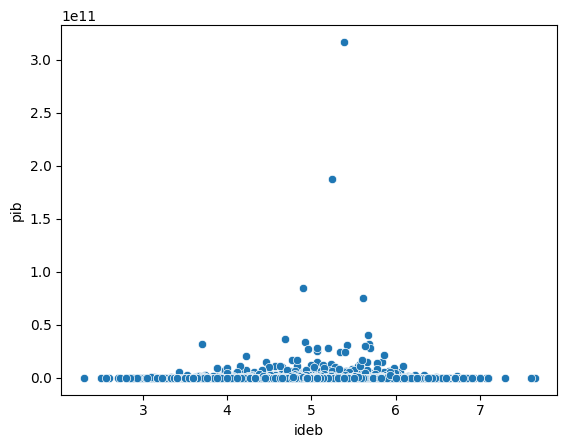

In [ ]:
import seaborn as sns
sns.scatterplot(data=merge_df, x='ideb', y='pib')

Correlação baixissima com varios outlier

In [ ]:
# seu código
merge_df[['ideb','pib']].corr(method = 'pearson')

,ideb,pib
ideb,1.000000,0.035281
pib,0.035281,1.000000


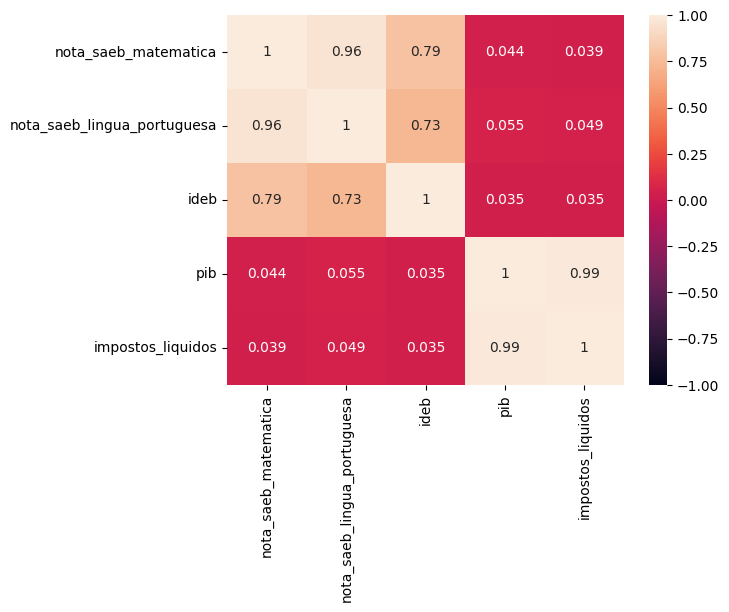

In [ ]:
sns.heatmap(merge_df.corr(), vmin = -1, vmax=1, annot = True);

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

Nada... Id_Municipo é apenas uma referencia dentro de minha tabela, não acredito que faria sentido falarmos de correlação entre esses dois temos.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e observar os dados do dataframe.

In [ ]:
dfseg = pd.read_csv(r'/content/seg_rj.csv')
display(dfseg)

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2021,2,2021m02,1.41,0.02,0.07,1.50,0.85,2.35,1.91,...,4.71,0.20,23.65,1.68,0.14,0.03,3.75,0.00,281.30,3.0
218,2021,3,2021m03,1.80,0.04,0.05,1.89,0.91,2.79,2.36,...,6.13,0.20,26.01,1.88,0.13,0.01,3.75,0.00,311.49,3.0
219,2021,4,2021m04,1.73,0.02,0.04,1.79,0.81,2.60,1.93,...,5.04,0.15,22.30,1.59,0.11,0.03,5.63,0.00,274.01,2.0
220,2021,5,2021m05,1.52,0.01,0.03,1.57,0.64,2.21,1.95,...,5.56,0.25,23.08,1.64,0.17,0.01,1.88,11.56,286.05,2.0


In [ ]:
dfseg.dtypes

ano                             int64
mes                             int64
mes_ano                        object
hom_doloso                    float64
lesao_corp_morte              float64
latrocinio                    float64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta           float64
tentat_hom                    float64
lesao_corp_dolosa             float64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte              float64
roubo_celular                 float64
roubo_em_coletivo             float64
roubo_rua                     float64
roubo_veiculo                 float64
roubo_carga                   float64
roubo_comercio                float64
roubo_residencia              float64
roubo_banco                   float64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicl

### Atividade 8: Filtrar os dados ano de 2020 e selecionar as variáveis: mês, hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial, e trafico_drogas. Em seguida calcular a correlação de spearman e identificar quais são as correlações fortes e muito fortes (se houver).

In [ ]:
seg = dfseg.loc[:,["ano","mes","hom_doloso","lesao_corp_morte","latrocinio","cvli","hom_por_interv_policial","trafico_drogas"]]
seg.head()


,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
0,2003,1,4.01,0.04,0.14,4.19,0.61,NaN
1,2003,2,3.97,0.03,0.08,4.08,0.76,NaN
2,2003,3,4.17,0.03,0.11,4.32,0.77,NaN
3,2003,4,3.98,0.07,0.10,4.15,0.85,NaN
4,2003,5,4.08,0.04,0.14,4.25,0.65,NaN


In [ ]:
filter_seg = seg.loc[(seg['ano'] == 2020)]
seg_treated = filter_seg.drop(columns = ['ano','mes'])
display(seg_treated)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,2.07,0.02,0.05,2.14,0.90,5.06
205,1.88,0.01,0.06,1.95,0.95,5.06
206,2.16,0.01,0.05,2.22,0.66,4.70
207,1.80,0.03,0.03,1.86,1.03,5.29
208,1.57,0.00,0.03,1.61,0.75,5.39
209,1.49,0.01,0.01,1.52,0.20,4.71
210,1.48,0.02,0.04,1.54,0.30,5.15
211,1.50,0.01,0.07,1.58,0.29,5.28
212,1.37,0.02,0.04,1.43,0.31,5.12
213,1.59,0.01,0.03,1.63,0.83,5.23


In [ ]:
seg_treated.shape

(12, 6)

In [ ]:
seg_treated.corr(method = 'spearman')

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
hom_doloso,1.000000,-0.064753,0.423852,0.993007,0.664336,-0.396494
lesao_corp_morte,-0.064753,1.000000,-0.031304,-0.026663,0.159977,0.053513
latrocinio,0.423852,-0.031304,1.000000,0.456180,0.017960,-0.252321
cvli,0.993007,-0.026663,0.456180,1.000000,0.678322,-0.357897
hom_por_interv_policial,0.664336,0.159977,0.017960,0.678322,1.000000,0.249124
trafico_drogas,-0.396494,0.053513,-0.252321,-0.357897,0.249124,1.000000


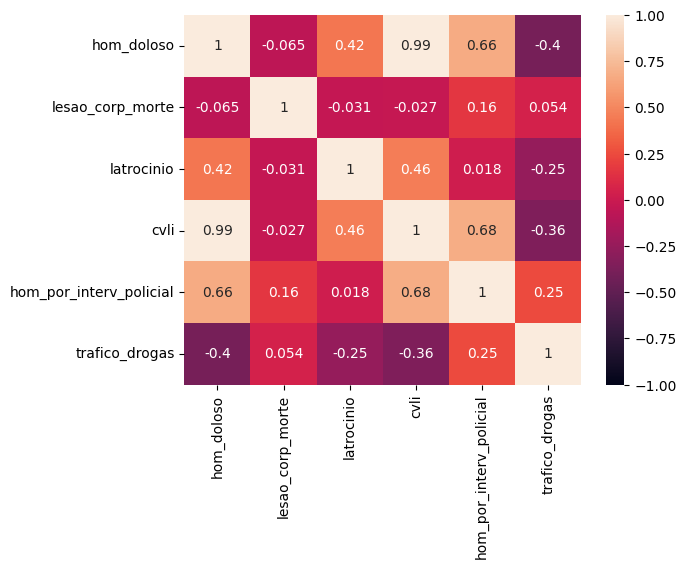

In [ ]:
sns.heatmap(seg_treated.corr(method = 'spearman'), vmin = -1, vmax=1, annot = True);

Considerando:
0,5 a 0,75 -> Correlação Moderada
0,75 a 0,9 -> Correlação Forte
0,90 a 1 -> Correlação Muito Forte

In [ ]:
# 0,5 a 0,75 -> Correlação Moderada
# 0,75 a 0,9 -> Correlação Forte
# 0,90 a 1 -> Correlação Muito Forte


# latrocinio x hom_doloso (0,42) -> Correlação fraca
# cvli x latrocinio (0,46) -> Correlação fraca
# cvli x hom_doloso (0,99) [São a mesma coisa na pratica] -> Correlação praticamente impossivel
# hom_por_interv_policial x hom_doloso (0,66) -> Correlação moderada
# hom_por_interv_policial x cvli (0,68) -> Correlação moderada


Portanto, pela minha análise não há uma correlação alta. Apenas algumas correlações moderadas: **hom_por_interv_policial x hom_doloso** e **hom_por_interv_policial x cvli**

E uma correlação muito forte (praticamente perfeita) entre **cvli x hom_doloso**

Vale destacar, também uma fraca correlação entre **latrocinio x hom_doloso** e **cvli x latrocinio**